## GIXOS using flight path on Soller position

Settings at 2024-02-28
14.4 keV
to be entered

TODO:
define functions to wrap up the data processing

In [85]:
#c = from_profile('opls')
import os
print(os.environ.get('CONDA_DEFAULT_ENV'))
#must be run in the 2025-2.2-py311-tiled  environment (or latter)

2025-2.2-py311-tiled


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import os
import time
from databroker import Broker
import pyFAI.calibrant as calib
from pyFAI.multi_geometry import MultiGeometry
from pyFAI.gui import jupyter
from PIL import Image
from pxrr.preprocess import *

In [87]:
%matplotlib inline

In [88]:
# set path
path = '/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/'

In [89]:
db = Broker(c)

In [90]:
# # some parameters of p100k
# sdd = 670/1000  #
# pxsize = 172e-6  # in metre
# bad_pixel = (100, 269)
# roi_y = 195-109 # 195-99 for water
# roi_x = 25 # for the new 100k # old values 45 # 36 for water, and 45 for later (e.g. pfoa)
# roi_dy = 3    # +/- 3 px around the centre, now take a bit more on the far tth side cuz there is no contamination
# solidangle_ref = pxsize*(roi_dy*2+1)*pxsize*1/sdd**2


In [182]:
# # p100kA # 2025-06-06 HZ
# sdd = 653/1000  #
# pxsize = 172e-6  # in metre
# bad_pixel = (100, 269)
# roi_y = 85 # 195-99 for water
# roi_x = 21 # for the new 100k # old values 45 # 36 for water, and 45 for later (e.g. pfoa)
# roi_dy = 2    # +/- 3 px around the centre, now take a bit more on the far tth side cuz there is no contamination
# solidangle_ref = pxsize*(roi_dy*2+1)*pxsize*1/sdd**2

In [183]:
# # p100kA # 2025-06-19 APW
# sdd = 653/1000  #
# pxsize = 172e-6  # in metre
# bad_pixel = (100, 269)
# roi_y = 195-110 # for water
# roi_x = 29 #33 # for the new 100k # old values 45 # 36 for water, and 45 for later (e.g. pfoa)
# roi_dy = 4    # +/- 3 px around the centre, now take a bit more on the far tth side cuz there is no contamination
# solidangle_ref = pxsize*(roi_dy*2+1)*pxsize*1/sdd**2

In [210]:
# p100kA # 2025-09-30 APW
sdd = 633/1000  #
sdd = 680/1000  #
pxsize = 172e-6  # in metre
bad_pixel = (100, 269)
roi_y = 195-111 # for water
roi_x = 41+9 #33 # for the new 100k # old values 45 # 36 for water, and 45 for later (e.g. pfoa)
roi_dy = 3    # +/- 3 px around the centre, now take a bit more on the far tth side cuz there is no contamination
solidangle_ref = pxsize*(roi_dy*2+1)*pxsize*1/sdd**2

### Search the gid scans

In [211]:
headers = db(since='2025-9-18', plan_name='gid_soller')
for h in headers:
    print(h.start['scan_id'], h.start['sample_name'])

50461 Water1_gixos
50462 Water1_gixos_bkg
50463 Water1_gixos
50464 Water1_gixos_bkg
50465 Water1_gixos
50466 Water1_gixos_bkg
50467 Water1_gixos
50468 Water1_gixos_bkg
50469 Water1_gixos
50470 Water1_gixos_bkg
50471 Water1_gixos
50472 Water1_gixos_bkg
50473 Water1_gixos
50474 Water1_gixos_bkg
50475 gid_soller_incident0p0728_direct
50476 gid_soller_incident0p0728_direct
50477 AgBH_alpha0
50478 gid_soller_incident_alpha0
50481 Water1
50486 Water1
50493 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50494 PFOA_0p2mM_chit_2gL_pH5p5_gixos_bkg
50495 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50496 PFOA_0p2mM_chit_2gL_pH5p5_gixos_bkg
50497 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50498 PFOA_0p2mM_chit_2gL_pH5p5_gixos_bkg
50499 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50500 PFOA_0p2mM_chit_2gL_pH5p5_gixos_bkg
50501 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50502 PFOA_0p2mM_chit_2gL_pH5p5_gixos_bkg
50503 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50504 PFOA_0p2mM_chit_2gL_pH5p5_gixos_bkg
50505 PFOA_0p2mM_chit_2gL_pH5p5_gixos
50506 PFOA_0p2mM_chit_2gL_pH5p5_g

51139 0.1mM_to_1mM_PFOS_OTAB_gixos
51140 0.1mM_to_1mM_PFOS_OTAB_gixos_bkg
51141 0.1mM_to_1mM_PFOS_OTAB_gixos
51142 0.1mM_to_1mM_PFOS_OTAB_gixos_bkg
51143 0.1mM_to_1mM_PFOS_OTAB_gixos
51144 0.1mM_to_1mM_PFOS_OTAB_gixos_bkg
51153 0.1mM_to_1mM_PFOS_OTAB
51163 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51164 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51165 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51166 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51167 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51168 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51169 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51170 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51171 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51172 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51173 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51174 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51175 0.1mM_to_0p01mM_PFOS_OTAB_gixos
51176 0.1mM_to_0p01mM_PFOS_OTAB_gixos_bkg
51179 0.1mM_to_0p01mM_PFOS_OTAB
51188 0.1mM_to_0p001mM_PFOS_OTAB_gixos
51189 0.1mM_to_0p001mM_PFOS_OTAB_gixos_bkg
51190 0.1mM_to_0p001mM_PFOS_OTAB_gixos
51191 0.1mM_to_0p001mM_PFOS_OTAB_gix

In [212]:
# headers = db(since='2025-06-18', plan_name='reflection_fluorescence_scan')
# for h in headers:
#     print(h.start['scan_id'], h.start['sample_name'])
    

### load single scan file and view

14.4keV

In [213]:
# fdir
# one_id = 44524 #40061
# #roi_y = 96
# roi_y = 195-109
# h = db[one_id]
# #print(type(h))
# h.data('pilatus100kA_image')
# p100k_3d = list(h.data('pilatus100kA_image'))
# # geometry
# tth = np.array(list(h.data('geo_stth')))
# height = np.array(list(h.data('geo_sh')))
# alpha = np.array(list(h.data('
# geo_alpha')))
# beta = np.array(list(h.data('geo_beta')))
# ener = h.start['energy']
# lbda = 12.39842 / (ener / 1000)
# qxy = 4*np.pi*np.sin(np.deg2rad(tth)/2) / lbda
# print(qxy)
# print(height)
# print(tth)
# print(alpha)
# print(beta)

# monitor_rate = np.array(c[one_id]['primary']['data']['monitor_3'])
# #counting_time = np.array(c[one_id]['primary']['data']['monitor_3'])
# #print(np.sum(tiled_data))

# # plot 2dSurfac
# fig,ax = plt.subplots()
# ax.imshow(np.squeeze(sum(p100k_3d)), vmax = 200)
# plt.axvline(x=roi_x, linestyle = "-.", linewidth = 0.5, color = 'r')
# plt.axhline(y=roi_y-roi_dy, linestyle = "-.", linewidth = 0.5, color = 'r')
# plt.axhline(y=roi_y, linestyle = "-.", linewidth = 0.5, color = 'r')
# plt.axhline(y=roi_y+roi_dy, linestyle = "-.", linewidth = 0.5, color = 'r')
# ax.set_xlim([0, 500])
#ax.set_ylim([roi_y-100, roi_y+100+1])

In [214]:
#c[one_id]['primary']['data']
#np.array(c[one_id]['primary']['data']['monitor_3'])

In [215]:
# load data and create azimuthal integrator set

# alpha = 85%
# water done
#sample_id_set = np.array(np.linspace(39554, 39573,20)) # water, roi_y = 97
#sample_id_set = np.array(np.linspace(39575, 39608,34))
# pfoa
# sample_id_set = np.array(np.linspace(39655, 39662,8)) # 15ppm
# sample_id_set = np.array(np.linspace(39672, 39679,8)) # 100ppm
# sample_id_set = np.array(np.linspace(39684, 39691,8)) # 300ppm

# sample_id_set = np.array(np.linspace(39715, 39722,8)) # 25ppm
# sample_id_set = np.array(np.linspace(39727, 39734,8)) # 150ppm
# sample_id_set = np.array(np.linspace(39743, 39750,8)) # 500ppm

# sample_id_set = np.array(np.linspace(39768, 39775,8)) # 50ppm
# sample_id_set = np.array(np.linspace(39780, 39787,8)) # 200ppm
# sample_id_set = np.array(np.linspace(39792, 39799,8)) # 1500ppm

# sample_id_set = np.array(np.linspace(39804, 39811,8)) # 15ppm, 2
# sample_id_set = np.array(np.linspace(39816,39823,8)) # 100ppm, 2
# sample_id_set = np.array(np.lSurfac inspace(39828,39835,8)) # 300ppm, 2

# # sample_id_set = np.array(np.linspace(39840, 39847,8)) # 25ppm, 2
# # sample_id_set = np.array(np.linspace(39852, 39859,8)) # 150ppm, 2
# sample_id_set = np.array(np.linspace(39864, 39871,8)) # 500ppm, 2

# # sample_id_set = np.array(np.linspace(39876, 39883,8)) # 25ppm, 2 after 8h (overnight)
# # sample_id_set = np.array(np.linspace(39888, 39895,8)) # 500ppm, 2 after 8h (overnight)

# sample_id_set = np.array(np.linspace(39901, 39908, 8)) # 4000ppm

# sample_id_set = np.array(np.linspace(39934, 39941, 8)) # 1300ppm in DIW, for comparison
# sample_id_set = [39982, 39983, 39984, 39985, 39992, 39993, 39990, 39991]

# sample_id_set = [39998, 39999, 40000, 40001]

# sample_id_set = [40023,40024,40025,40026,40027,40028,40029,40030]

# sample_id_set = np.array(np.linspace(40035,40042,8))

#sample_id_set = [40049, 40050]
#sample_id_set = [40054, 40055]
#sample_id_set = [40059, 40060]
#roi_y = 96 # 195-99 for water
#sample_id_set = [40051, 40052]
#roi_y = 90 # for bkg 
#sample_id_set = [40056, 40057]
#roi_y = 92 # for bkg
#sample_id_set = [40061, 40062]
#roi_y = 86 # for bkg 

# sample_id_set = [40067,40068]
# sample_id_set = [40069,40070]
# sample_id_set = [40091, 40092, 40093, 40094]
# sample_id_set = [40106, 40107Surfac, 40108, 40109]
# sample_id_set = [40114, 40115, 40116, 40117]

# sample_id_set = [40122, 40123, 40124, 40125, 40126, 40127, 40128, 40129] # 15ppm from re-measure of PFAS+EDTA
# sample_id_set = [40134, 40135, 40136, 40137, 40138, 40139, 40140, 40141] # 100ppm
# sample_id_set = [40146, 40147, 40148, 40149, 40150, 40151, 40152, 40153] # 300ppm
# sample_id_set = [40158, 40159, 40160, 40161, 40162, 40163, 40164, 40165] # 100, attempt 2
# sample_id_set = [40190, 40191, 40192, 40193, 40194, 40195, 40196, 40197] # 25ppm
# sample_id_set = [40202, 40203, 40204, 40205, 40206, 40207, 40208, 40209] # 150ppm
# sample_id_set = [40214, 40215, 40216, 40217, 40218, 40219, 40220, 40221] # 500ppm
# sample_id_set = [40226, 40227, 40228, 40229, 40230, 40231, 40232, 40233] # 25, attempt 2
# sample_id_set = [40240, 40241, 40242, 40243, 40244, 40245, 40246, 40247] # 50ppm
# sample_id_set = [40255, 40256, 40257, 40258, 40259, 40260, 40261, 40262] # 4000ppm

# sample_id_set = np.array(np.linspace(40269, 40269+7,8))
# sample_id_set = np.array(np.linspace(40283, 40283+7,8))
# sample_id_set = np.array(np.linspace(40297, 40297+7,8))
# sample_id_set = np.array(np.linspace(40311, 40311+7,8))
# #sample_id_set = np.array(np.linspace(40325, 40325+7,8))
# sample_id_set = np.array(np.linspace(40325, 40325+7,8))
# sample_id_set = np.array(np.linspace(40336, 40336+7,8))
# sample_id_set = np.array(np.linspace(40347, 40347+7,8))
# sample_id_set = np.array(np.linspace(40360, 40360+7,8))

# sample_id_set = np.array(np.linspace(40373, 40373+7,8))

# sample_id_set = np.array(np.linspace(40386, 40386+7,8))

# sample_id_set = np.array(np.linspace(40419, 40419+14,8))
# sample_id_set = np.array(np.linspace(40455, 40472,18))
# sample_id_set = np.array(np.linspace(44513,44545,24))
#sample_id_set = np.array(np.linspace(44554,44554,1))
#sample_id_set = np.array(np.linspace(44530,44531,2))
#sample_id_set = np.array(np.linspace(44542,44545,4))

# june 2025 first run
# sample_id_set = np.array(np.linspace(45545,45560,16))
# sample_id_set = np.array(np.linspace(45563,45578,16))
# sample_id_set = np.arange(45563,(45578+1))
# sample_id_set = np.arange(45591,(45594+1))

# sample_id_set=(45591,45592,45593,45594,45577,45578)
# sample_id_set = np.arange(45591,(45610+1))
# sample_id_set = np.arange(45616,45635+1)#WATER
# sample_id_set = np.arange(45643,45652+1)#pfoa 2Mm NOP SALT, NO Ph
# sample_id_set = np.arange(45677,45686+1)#pfoa 2Mm NOP SALT, NO Ph
# sample_id_set = np.arange(45693,45712+1)#pfoa 2Mm NOP SALT, NO Ph

# sample_id_set = np.arange(45778,45787+1) #50ppm PFOA w/ 100mM KCl at pH 7.03
# sample_id_set = np.arange(45846,45855+1) #50ppm PFOA w/ 100mM KCl at pH 7.03

# sample_id_set = np.arange(45862, 45871+1) #water
# sample_id_set = np.arange(45882, 45891+1) #water2
# sample_id_set = np.arange(45906, 45915+1) #water3
# sample_id_set = np.arange(46208,46217+1) #water3

# sample_id_set = np.arange(46224,46233+1)# 10mM_CaCl2_pH7p03_250ppm_PFOA_1, surface tension ~45mN/m
# sample_id_set = np.arange(46240,46249+1)# 10mM_CaCl2_pH7p03_10ppm_PFOA_1, surface tension ~65mN/m

# sample_id_set = np.arange(46324, 46333+1) #'10cmc_PS80_5_OA_41p7mNm'

# sample_id_set = np.arange(46392, 46401+1) #10mM_CaCl2_pH7p03_100ppm_PFOA_1

# sample_id_set = np.arange(46454, 46463+1) #10mM_KCl_pH7p03_250ppm_PFOA_2

# june 2025 seconmd run
#sample_id_set = np.arange(48546, 48555+1) #water
# sample_id_set = np.arange(48560, 48573+1) #same water, higher qxy
# sample_id_set = np.arange(48568, 48573+1) #same water, higher qxy

# sample_id_set = np.arange(48614, 48623+1)
# sample_id_set = np.arange(48644, 48653+1)

# sample_id_set = np.arange(48672, 48675+1) #PFOA & chitosan sample, crashed(?)
# sample_id_set = np.arange(48680, 48693+1) #PFOA & chitosan sample, crashed again
# sample_id_set = np.arange(48695, 48698+1) #PFOA & chitosan THIRD TIME IS THE CHARM
# sample_id_set = np.arange(48702, 48715+1) #PFOA & chitosan

#sample_id_set = np.arange(50461, 50474+1) #water
# sample_id_set = np.arange(50493, 50506+1) #PFOA_0p2mM_chit_2gL_pH5p5
sample_id_set = np.arange(51218, 51231+1) #PFOA_0p2mM_chit_2gL_pH6_run2





print(sample_id_set)

# alpha  = 200%
#sample_id_set = np.array(np.linspace(39620, 39625,6))
mg_ais = []
imgs = []
result_lst = []
monitor_lst = []
expo_time_lst = []
for sample_id in sample_id_set:
    print(roi_y, roi_dy)
    sample_id = int(sample_id)
    h_sample = db[sample_id]
    h_sample_monitor = np.mean(np.array(c[sample_id]['primary']['data']['monitor_3']))
    h_sample_expo_time = np.sum(np.array(c[sample_id]['primary']['data']['expo_time']))
    print(h_sample_monitor)
    result, ai_lst = loadgixos_ai(sample_id, mode = "sum", roi_y = roi_y, roi_dy=roi_dy, roi_x = roi_x, pxsize = pxsize, sdd = sdd)
    mg_ais = mg_ais + ai_lst
    imgs = imgs + result['gixos_1d'] 
    monitor_lst.append(h_sample_monitor)
    expo_time_lst.append(h_sample_expo_time)
    # geometry
    result['height'] = np.mean(np.array(list(h_sample.data('geo_sh'))))
    result['px_beta'] = np.rad2deg(np.arctan((np.arange((result['gixos_1d'][0].shape)[1])-roi_x)*pxsize/sdd)) + result['beta']
    result['px_qz'] = (np.sin(np.deg2rad(result['alpha'])) + np.sin(np.deg2rad(result['px_beta'])))*2*np.pi/result['wavelength'] 
    print('id = ', result['id'])
    print('qxy0 = ', result['qxy'])
    print('sample height = ', result['height'])
    #print('tth = ', result['tth'])
    #print('alpha = ', result['alpha'])
    #print('beta = ', result['beta'])
    result_lst.append(result)
    del result, ai_lst, h_sample

[51218 51219 51220 51221 51222 51223 51224 51225 51226 51227 51228 51229
 51230 51231]
84 3
3.646537087758402
no chamber data
sum frames of each scan
loading done
id =  51218
qxy0 =  0.04061061973771442
sample height =  -0.9753980153572996
84 3
3.6492434358596997
no chamber data
sum frames of each scan
loading done
id =  51219
qxy0 =  0.04061061973771419
sample height =  -1.975403952857306
84 3
3.648926973342915
no chamber data
sum frames of each scan
loading done
id =  51220
qxy0 =  0.06068655778731455
sample height =  -0.9753980153572996
84 3
3.6529480266571244
no chamber data
sum frames of each scan
loading done
id =  51221
qxy0 =  0.06063879596232328
sample height =  -1.975403952857306
84 3
3.6502148977915643
no chamber data
sum frames of each scan
loading done
id =  51222
qxy0 =  0.08068277849996167
sample height =  -0.9753980153572996
84 3
3.651621672312438
no chamber data
sum frames of each scan
loading done
id =  51223
qxy0 =  0.08057133497953932
sample height =  -1.97540395285

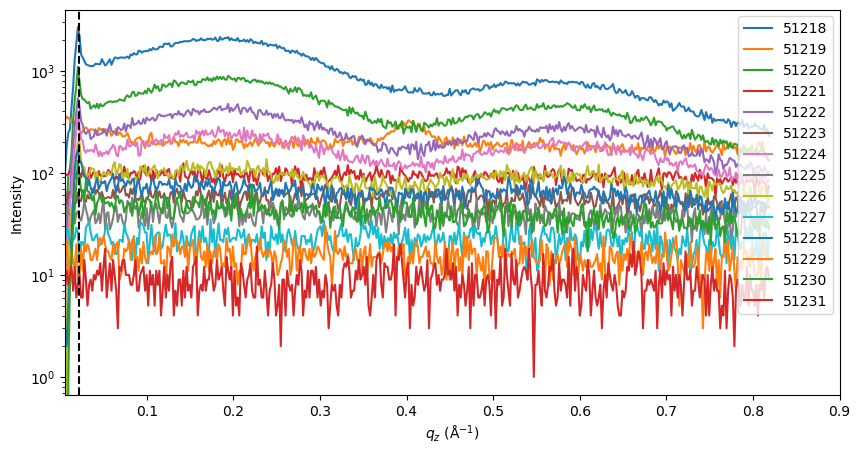

In [216]:
fig,ax = plt.subplots(figsize=[10, 5])
for idx in range(len(imgs)):
    ax.plot(result_lst[idx]['px_qz'], imgs[idx][0]/monitor_lst[idx]*np.mean(monitor_lst), '-', label = '%d' % result_lst[idx]['id'] )
ax.set_yscale('log')
#ax.set_ylim([20, 2000])
# plt.vlines(0.02176, 0, 1000, color='black', ls='--') #plot vertical line at 0.02176, critical angle H2O
ax.set_xlim([0.005, 0.9])
ax.set_ylabel(r'Intensity')
ax.set_xlabel(r'$q_{z}$ (${\rm \AA}^{-1}$)')
ax.legend(loc = 'upper right')
#plt.tight_layout()

ax.axvline(x=0.0217,ls='--',c='k')

plt.savefig(path+'gixos/'+str(int(sample_id_set[0]))+'_'+str(int(sample_id_set[-1]))+'.png', dpi=300)

In [217]:

print(path)
### Old method
# save 1d gixos file
for idx in range(len(imgs)):
    fileheader = 'header\nenergy = %.1f eV\nsdd = %f m\nalpha = %f deg\nbeta = %f deg\ntth = %f deg\nqxy0 = %f /A\nexpo_time = %d sec\nmonitor_3_ave = %f /sec\npx_size = %f m\nroi_x = %d\nroi_y = %d\nroi_dy = %d\nchamber_id = %d\ndata\nidx\tbeta\tintensity\tqz' %(result_lst[idx]['energy'], sdd, result_lst[idx]['alpha'], result_lst[idx]['beta'], result_lst[idx]['tth'], result_lst[idx]['qxy'], expo_time_lst[idx], np.mean(monitor_lst), pxsize, roi_x, roi_y, roi_dy, result_lst[idx]['bkg_id'])
    np.savetxt(path+'gixos/instrument-id'+str(result_lst[idx]['id'])+'.txt',np.column_stack((np.arange(len(result_lst[idx]['px_beta'])),result_lst[idx]['px_beta'],imgs[idx][0]/monitor_lst[idx]*np.mean(monitor_lst),result_lst[idx]['px_qz'])), fmt = '%f', header = fileheader)

### New method, Pandas compatible for multiplotting
print(path)
# save 1d gixos file
for idx in range(len(imgs)):
    fileheader = '{0}header\n{0}energy = %.1f eV\n{0}sdd = %f m\n{0}alpha = %f deg\n{0}beta = %f deg\n{0}tth = %f deg\n{0}qxy0 = %f /A\n{0}expo_time = %d sec\n{0}monitor_3_ave = %f /sec\n{0}px_size = %f m\n{0}roi_x = %d\n{0}roi_y = %d\n{0}roi_dy = %d\n{0}chamber_id = %d\n{0}data\nidx\tbeta\tintensity\tqz'.format('# ') %(result_lst[idx]['energy'], sdd, result_lst[idx]['alpha'], result_lst[idx]['beta'], result_lst[idx]['tth'], result_lst[idx]['qxy'], expo_time_lst[idx], np.mean(monitor_lst), pxsize, roi_x, roi_y, roi_dy, result_lst[idx]['bkg_id'])
    np.savetxt(path+'gixos2/instrument-id'+str(result_lst[idx]['id'])+'.txt',np.column_stack((np.arange(len(result_lst[idx]['px_beta'])),result_lst[idx]['px_beta'],imgs[idx][0]/monitor_lst[idx]*np.mean(monitor_lst),result_lst[idx]['px_qz'])), fmt = '%f', header = fileheader, comments='', delimiter='\t')
    print(path+'gixos2/instrument-id'+str(result_lst[idx]['id'])+'.txt')


/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51218.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51219.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51220.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51221.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51222.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51223.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51224.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51225.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51226.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51227.txt
/nsls2/xf12id1/users/2025-3/319544_Ocko2/PseudoXRR/gixos2/instrument-id51228.txt
/nsls

# save gixos from pilatus as tiff
for sample_id in sample_id_set:
    sample_id = int(sample_id)
    h = db[sample_id]
    gixos_3d = []
    for i,one_image in enumerate(h.data('pilatus100k_image')):
        gixos_3d.append(one_image)

    gixos_3d = np.array(gixos_3d)
    gixos_2d = np.squeeze(np.sum(gixos_3d, axis = 0))
    gixos_2d_img = Image.fromarray(gixos_2d)
    gixos_2d_img.save(path+'p100k/'+str(sample_id)+'.tiff', 'tiff')
    del gixos_3d, gixos_2d, gixos_2d_img, h, one_image